In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
import time, os
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
from sklearn.decomposition import TruncatedSVD, NMF
from sklearn.metrics.pairwise import cosine_similarity
import nltk
import re 
import string
from textblob import TextBlob
from nltk.tokenize import sent_tokenize,word_tokenize,MWETokenizer, RegexpTokenizer
from nltk.corpus import wordnet
from nltk.util import ngrams
from nltk.stem import PorterStemmer, SnowballStemmer, LancasterStemmer,WordNetLemmatizer
from gensim import corpora, models, similarities, matutils
from corextopic import corextopic as ct
import seaborn as sns

/Users/nickpondok/opt/anaconda3/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [2]:
new_reviews = pd.read_csv('preprocessed_reviews.csv')
new_reviews.drop('Unnamed: 0',axis=1,inplace=True)
new_reviews.head()

review
0  shang_chi review spectacular visual wonder my ...
1  the much await change chi and the legend of th...
2  like many I be concerned that this new marvel ...
3  no movie be without flaw but this be a breath ...
4  hand down one of the good you move every actor...

In [3]:
#CountVectorizer

reviews_series=new_reviews.review

vectorizer = CountVectorizer(stop_words='english',max_df=.1,ngram_range=(1,2))
doc_word = vectorizer.fit_transform(reviews_series)


doc_term=pd.DataFrame(doc_word.toarray(), columns=vectorizer.get_feature_names())

doc_term.head()

aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa  aaaaawwwwssssoooommmeeee  abbe  abc  \
0                                      0                         0     0    0   
1                                      0                         0     0    0   
2                                      0                         0     0    0   
3                                      0                         0     0    0   
4                                      0                         0     0    0   

   abc american  abc movie  ability  ability comic  ability continue  \
0             0          0        0              0                 0   
1             0          0        0              0                 0   
2             0          0        0              0                 0   
3             0          0        0              0                 0   
4             0          0        0              0                 0   

   ability fearlessly  ...  zero  zero feel  zero foul  zheg  zone  \
0                   0  ...     0          0          0     0     0   
1                   0  ...     0          0          0     0     0   
2                   0  ...     0          0          0     0     0   
3                   0  ...     0          0          0     0     0   
4                   0  ...     0          0          0     0     0   

   zone marvel  zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz  ÁîüËÄÖÂ¶ÇÊñØ  ÈÄùËÄÖÂÆâÊÅØ  ÈÄùËÄÖÂÆâÊÅØ ÁîüËÄÖÂ¶ÇÊñØ  
0            0                                     0     0     0          0  
1            0                                     0     0     0          0  
2            0                                     0     0     0          0  
3            0                                     0     0     0          0  
4            0                                     0     0     0          0  

[5 rows x 22343 columns]

### LSA Model

In [4]:
#LSA Model
lsa = TruncatedSVD(5)
doc_topic = lsa.fit_transform(doc_word)
lsa.explained_variance_ratio_

array([0.02268704, 0.01086508, 0.00918322, 0.0085867 , 0.00846   ])

In [5]:
#create topic word matrix
topic_word = pd.DataFrame(lsa.components_.round(3),
             index = ["component_1","component_2",'component_3','component_4','componnt_5'], #,'component_4','componnt_5'
             columns = vectorizer.get_feature_names())
topic_word

aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa  aaaaawwwwssssoooommmeeee  \
component_1                                    0.0                       0.0   
component_2                                   -0.0                      -0.0   
component_3                                   -0.0                      -0.0   
component_4                                   -0.0                      -0.0   
componnt_5                                     0.0                      -0.0   

             abbe    abc  abc american  abc movie  ability  ability comic  \
component_1   0.0  0.001         0.000      0.000    0.009          0.000   
component_2  -0.0 -0.001        -0.000     -0.001    0.001         -0.000   
component_3  -0.0 -0.000         0.001     -0.001   -0.026          0.001   
component_4  -0.0  0.001         0.000      0.001    0.004          0.000   
componnt_5    0.0 -0.000         0.000     -0.001   -0.022         -0.001   

             ability continue  ability fearlessly  ...   zero  zero feel  \
component_1             0.000               0.001  ...  0.005      0.004   
component_2            -0.000               0.002  ... -0.003     -0.004   
component_3            -0.000              -0.001  ...  0.027      0.027   
component_4             0.001              -0.000  ... -0.006     -0.006   
componnt_5             -0.001               0.001  ... -0.001     -0.001   

             zero foul   zheg  zone  zone marvel  \
component_1      0.001  0.000   0.0          0.0   
component_2      0.001  0.000   0.0          0.0   
component_3     -0.000 -0.000  -0.0         -0.0   
component_4     -0.000  0.001  -0.0         -0.0   
componnt_5      -0.000 -0.001  -0.0         -0.0   

             zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz  ÁîüËÄÖÂ¶ÇÊñØ  ÈÄùËÄÖÂÆâÊÅØ  ÈÄùËÄÖÂÆâÊÅØ ÁîüËÄÖÂ¶ÇÊñØ  
component_1                                   0.0   0.0   0.0        0.0  
component_2                                   0.0  -0.0  -0.0       -0.0  
component_3                                  -0.0  -0.0  -0.0       -0.0  
component_4                                  -0.0   0.0   0.0        0.0  
componnt_5                                    0.0  -0.0  -0.0       -0.0  

[5 rows x 22343 columns]

In [6]:
#function to display top words in topics

def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
        
        
#display top words

display_topics(lsa, vectorizer.get_feature_names(), 20)


Topic  0
make, really, feel, time, ring, asia, fight scene, art, long, martial, way, think, new, martial art, chi, end, bad, culture, actor, come

Topic  1
sequence, long, ring, world, art, tony_leung, simu_liu, legend, wonderful, action sequence, actor, new, legend ring, stand, performance, cinema, martial art, martial, mitchell, add

Topic  2
asia, way, feel, dad, sum, culture, didn, bit, feel like, death, bad, development, character development, asia culture, chinese, ring, long, representation, plot, think

Topic  3
make, time, bad, father, end, score, flashback, plot, year, try, high, tell, explain, power, background, use, fun, background score, extraordinary, don

Topic  4
feel, really, visual, score, worth, extraordinary, cast, background, background score, bring, awesome, superhero, high, time, style, definitely, sound, fantastic, cinematography, notch


### NMF Model

In [7]:
#vectorizer

vectorizer = CountVectorizer(stop_words='english',max_df=.1,ngram_range=(1,2))
doc_word_nmf = vectorizer.fit_transform(reviews_series)

doc_word_nmf


<2206x22343 sparse matrix of type '<class 'numpy.int64'>'
	with 49241 stored elements in Compressed Sparse Row format>

In [8]:
#intialize model 

nmf_model = NMF(5)
doc_topic_NMF = nmf_model.fit_transform(doc_word_nmf)
doc_topic_NMF.shape

/Users/nickpondok/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


(2206, 5)

In [9]:
nmf_model.components_.shape

(5, 22343)

In [10]:
doc_topic_df=pd.DataFrame(doc_topic_NMF)
doc_topic_df

0         1         2         3         4
0     0.000000  0.000000  0.000000  0.000000  4.876512
1     0.000000  4.850770  0.000000  0.000000  0.000000
2     0.791422  0.045484  0.129428  0.000000  0.000000
3     0.000000  0.000000  0.049984  1.098833  0.000000
4     1.154882  0.000000  0.000000  0.000000  0.000000
...        ...       ...       ...       ...       ...
2201  0.000000  0.000000  0.000000  0.000000  0.000000
2202  0.000000  0.000000  0.009223  0.001476  0.000000
2203  0.000000  0.000000  0.000000  0.000000  0.000000
2204  0.003917  0.000000  0.008876  0.013418  0.000000
2205  0.003322  0.000000  0.000000  0.000000  0.000368

[2206 rows x 5 columns]

In [11]:
def get_max(row):
    max_idx=row.argmax()
    return max_idx



new_series = doc_topic_df.idxmax(axis=1)
doc_topic_df['topic']=new_series
doc_topic_df

0         1         2         3         4  topic
0     0.000000  0.000000  0.000000  0.000000  4.876512      4
1     0.000000  4.850770  0.000000  0.000000  0.000000      1
2     0.791422  0.045484  0.129428  0.000000  0.000000      0
3     0.000000  0.000000  0.049984  1.098833  0.000000      3
4     1.154882  0.000000  0.000000  0.000000  0.000000      0
...        ...       ...       ...       ...       ...    ...
2201  0.000000  0.000000  0.000000  0.000000  0.000000      0
2202  0.000000  0.000000  0.009223  0.001476  0.000000      2
2203  0.000000  0.000000  0.000000  0.000000  0.000000      0
2204  0.003917  0.000000  0.008876  0.013418  0.000000      3
2205  0.003322  0.000000  0.000000  0.000000  0.000368      0

[2206 rows x 6 columns]

In [12]:
#topic word matrix

topic_word_nmf = pd.DataFrame(nmf_model.components_.round(3),
             index = ["component_1","component_2",'component_3','compenent_4','compenent_5'], #,'compenent_4','compenent_5'
             columns = vectorizer.get_feature_names())
topic_word_nmf

aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa  aaaaawwwwssssoooommmeeee  \
component_1                                  0.001                       0.0   
component_2                                  0.000                       0.0   
component_3                                  0.000                       0.0   
compenent_4                                  0.000                       0.0   
compenent_5                                  0.000                       0.0   

             abbe    abc  abc american  abc movie  ability  ability comic  \
component_1   0.0  0.003         0.003      0.001    0.053          0.000   
component_2   0.0  0.000         0.000      0.000    0.000          0.001   
component_3   0.0  0.000         0.001      0.000    0.000          0.001   
compenent_4   0.0  0.008         0.001      0.007    0.059          0.004   
compenent_5   0.0  0.000         0.000      0.000    0.000          0.000   

             ability continue  ability fearlessly  ...   zero  zero feel  \
component_1             0.000               0.004  ...  0.000      0.000   
component_2             0.000               0.005  ...  0.000      0.000   
component_3             0.000               0.000  ...  0.134      0.134   
compenent_4             0.005               0.000  ...  0.000      0.000   
compenent_5             0.000               0.008  ...  0.000      0.000   

             zero foul   zheg   zone  zone marvel  \
component_1      0.004  0.000  0.001        0.001   
component_2      0.006  0.000  0.001        0.001   
component_3      0.000  0.000  0.000        0.000   
compenent_4      0.000  0.007  0.000        0.000   
compenent_5      0.000  0.000  0.000        0.000   

             zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz   ÁîüËÄÖÂ¶ÇÊñØ   ÈÄùËÄÖÂÆâÊÅØ  ÈÄùËÄÖÂÆâÊÅØ ÁîüËÄÖÂ¶ÇÊñØ  
component_1                                   0.0  0.001  0.001      0.001  
component_2                                   0.0  0.000  0.000      0.000  
component_3                                   0.0  0.000  0.000      0.000  
compenent_4                                   0.0  0.001  0.001      0.001  
compenent_5                                   0.0  0.000  0.000      0.000  

[5 rows x 22343 columns]

In [13]:
#get top words

display_topics(nmf_model, vectorizer.get_feature_names(), 20)


Topic  0
really, feel, art, martial, martial art, fight scene, definitely, awesome, fighting, enjoy, new, think, lot, marvel movie, feel like, choreography, chi, visual, act, funny

Topic  1
sequence, long, ring, world, legend, wonderful, new, tony_leung, stand, simu_liu, legend ring, chi, actor, action sequence, chinese, way, art, phase, cinema, makarin

Topic  2
asia, way, culture, dad, feel, representation, sum, didn, asia culture, bit, man, death, character development, development, think, cast, overall, year, come, plot

Topic  3
make, bad, plot, end, time, father, use, ring, fight scene, try, tell, think, flashback, explain, place, say, come, year, thing, didn

Topic  4
time, score, world, background, high, visual, background score, extraordinary, cast, performance, worth, superhero, actor, bring, don, cinematography, style, power, make, seat


### LDA Model

In [14]:
#Vectorizer 

vectorizer = CountVectorizer(stop_words='english',max_df=.1,ngram_range=(1,2))
doc_word_lda = vectorizer.fit_transform(reviews_series)

In [15]:
# Convert sparse matrix of counts to a gensim corpus
corpus = matutils.Sparse2Corpus(doc_word_lda)

In [16]:
id2word = dict((v, k) for k, v in vectorizer.vocabulary_.items())
len(id2word)

22343

In [17]:
lda = models.LdaModel(corpus=corpus, num_topics=5, id2word=id2word, passes=10)


In [18]:
lda.print_topics()

[(0,
  '0.014*"ability project" + 0.010*"able know" + 0.009*"action fight" + 0.009*"actually bad" + 0.009*"actor like" + 0.008*"acting incredible" + 0.008*"act effectively" + 0.008*"absolutely" + 0.007*"absolutely kill" + 0.007*"act character"'),
 (1,
  '0.022*"able akwafinas" + 0.021*"able connect" + 0.018*"beautiful costing" + 0.018*"abbe" + 0.016*"ability movie" + 0.015*"able" + 0.014*"acting awkward" + 0.013*"absolutely stunning" + 0.012*"absolutely perfect" + 0.012*"act single"'),
 (2,
  '0.021*"absolute delight" + 0.019*"absolutely brilliantly" + 0.018*"abc" + 0.016*"abundant ton" + 0.014*"act beautiful" + 0.013*"absolute joy" + 0.012*"accept right" + 0.011*"act love" + 0.011*"action didn" + 0.011*"ability continue"'),
 (3,
  '0.035*"aaaaawwwwssssoooommmeeee" + 0.027*"able control" + 0.014*"acting amazing" + 0.013*"able read" + 0.012*"act slow" + 0.012*"action chi" + 0.010*"act awesome" + 0.010*"absolutely dynamic" + 0.009*"action engage" + 0.009*"able law"'),
 (4,
  '0.032*"aaaa

In [19]:
lda_corpus = lda[corpus]
lda_corpus

In [20]:
lda_docs = [doc for doc in lda_corpus]

lda_docs

[[(0, 0.10063779),
  (1, 0.10064585),
  (2, 0.10064439),
  (3, 0.5974253),
  (4, 0.10064667)],
 [(0, 0.10021728),
  (1, 0.10022084),
  (2, 0.10021892),
  (3, 0.599124),
  (4, 0.1002189)],
 [(0, 0.100034475),
  (1, 0.10003469),
  (2, 0.10003503),
  (3, 0.59986115),
  (4, 0.10003469)],
 [(0, 0.0666775),
  (1, 0.06667762),
  (2, 0.0666776),
  (3, 0.39998427),
  (4, 0.39998305)],
 [(0, 0.100007355),
  (1, 0.10000745),
  (2, 0.100007445),
  (3, 0.100007445),
  (4, 0.59997034)],
 [(0, 0.100007534),
  (1, 0.10000762),
  (2, 0.1000076),
  (3, 0.5999697),
  (4, 0.100007586)],
 [(0, 0.025005588),
  (1, 0.025005631),
  (2, 0.5253384),
  (3, 0.14961171),
  (4, 0.27503866)],
 [(0, 0.10000666),
  (1, 0.10000673),
  (2, 0.59997314),
  (3, 0.10000675),
  (4, 0.10000668)],
 [(0, 0.100012146),
  (1, 0.10001224),
  (2, 0.100012265),
  (3, 0.5999512),
  (4, 0.10001219)],
 [(0, 0.10000114),
  (1, 0.10000117),
  (2, 0.5999954),
  (3, 0.10000117),
  (4, 0.10000114)],
 [(0, 0.10000077),
  (1, 0.10000078),
  (

In [21]:
len(lda_docs)

22343

### Corex Model

In [22]:
!pip install corextopic
!pip install networkx

In [23]:
#Vectorizer 

vectorizer_corex = CountVectorizer(stop_words='english',max_df=.8,ngram_range=(1,1),binary=True)
doc_word_corex = vectorizer_corex.fit_transform(reviews_series)
words_corex=list(np.asarray(vectorizer_corex.get_feature_names()))

In [24]:
corex_top_model=ct.Corex(n_hidden=4, words=words_corex, seed=1)
corex_top_model.fit(doc_word_corex, words=words_corex,anchors=['story','culture','martial','cast'], docs=new_reviews.review)

#,anchors=['story','culture','martial','cast']

In [25]:
topics_corex = corex_top_model.get_topics()
for n,topic in enumerate(topics_corex):
    topic_words,_,_ = zip(*topic)
    print('{}: '.format(n) + ','.join(topic_words))
#Topic 0 = story line, fighting scene
#Topic 1 = Asian culture 
#Topic 2 = Martial Arts and Fantasy 
#Topic 3 = Cast i.e awkwafina, simu_liu tony_leung

0: scene,story,fight,action,great,visual,effect,film,humor,credit
1: culture,asia,make,chinese,king,ff,people,marvel,american,especially
2: like,character,shang_chi,martial,art,villain,awkwafina,think,ring,come
3: feel,just,way,really,time,don,review,watch,simu_liu,cast


In [109]:
corex_top_model.tc

6.300563326546238

In [110]:
corex_top_model.tcs

array([1.04159306, 1.13068519, 1.26230412, 2.86598096])

Text(0.5, 1.0, 'Topic Correlation Distribution')

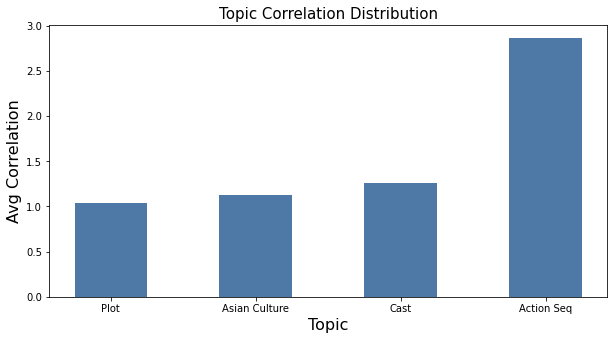

In [114]:
plt.figure(figsize=(10,5))
plt.bar(range(corex_top_model.tcs.shape[0]), sorted(corex_top_model.tcs), color='#4e79a7', width=0.5)
plt.xlabel('Topic', fontsize=16)
plt.ylabel('Avg Correlation', fontsize=16);
plt.xticks(ticks=range(4),labels=['Plot','Asian Culture','Cast','Action Seq'])
plt.title("Topic Correlation Distribution", fontsize='15')

In [29]:
#topics that are most informative about the documents

corex_top_model.log_z

array([[ 2.99259224e+01,  4.62728612e+01,  1.06133296e+02,
         4.22821653e+01],
       [ 1.91447606e+01,  4.39574944e+01,  1.67546211e+02,
         4.58811267e+01],
       [ 1.70068547e+01,  2.18996521e+01,  7.60097145e+01,
         1.82318272e+01],
       ...,
       [ 1.26686259e+00,  1.04593918e+00,  1.92898536e+00,
         1.32673259e+00],
       [ 1.63830804e+00,  1.04599039e+00,  1.92898568e+00,
         8.75793527e-01],
       [-1.27867662e-02,  1.04578784e+00,  1.92898505e+00,
         1.31133806e+00]])

In [30]:
#create topic correlation dataframe

topic_corr=pd.DataFrame(corex_top_model.log_z)



new_series = topic_corr.idxmax(axis=1)
topic_corr['topic']=new_series
topic_corr

0          1           2          3  topic
0     29.925922  46.272861  106.133296  42.282165      2
1     19.144761  43.957494  167.546211  45.881127      2
2     17.006855  21.899652   76.009715  18.231827      2
3     18.124267  26.278896   81.628482  18.758335      2
4      2.821532  12.760697   48.637745  19.196610      2
...         ...        ...         ...        ...    ...
2201   1.638308   0.881598    1.928986   1.327120      2
2202   1.628550   1.044426    1.547247   1.324006      0
2203   1.266863   1.045939    1.928985   1.326733      2
2204   1.638308   1.045990    1.928986   0.875794      2
2205  -0.012787   1.045788    1.928985   1.311338      2

[2206 rows x 5 columns]

### Sentiment Analysis Corex

In [31]:
#function to get polarity of each review
def get_polarity(string):
    polarity = TextBlob(string).sentiment
    return polarity[0]


new_reviews['polarity']=new_reviews['review'].apply(get_polarity)

new_reviews.head(1)

review  polarity
0  shang_chi review spectacular visual wonder my ...  0.178936

In [32]:
final_df_corex=new_reviews.merge(topic_corr,left_index=True,right_index=True)
final_df_corex.describe()

polarity            0            1            2            3  \
count  2206.000000  2206.000000  2206.000000  2206.000000  2206.000000   
mean      0.369056     1.041593     1.130685     2.865981     1.262304   
std       0.268369     2.255175     3.242228     9.693593     3.414894   
min      -1.000000    -2.956858    -3.317748    -8.958852    -3.367980   
25%       0.207143    -0.189387     0.165039     0.719494     0.065468   
50%       0.375000     1.050493     0.790981     1.561454     0.844183   
75%       0.550000     1.636754     0.926135     1.928794     1.323716   
max       1.000000    29.925922    46.272861   167.546211    45.881127   

             topic  
count  2206.000000  
mean      1.600635  
std       0.976169  
min       0.000000  
25%       1.000000  
50%       2.000000  
75%       2.000000  
max       3.000000

In [33]:
def label_polarity(polarity):
    if polarity <= 0:
        return 'neg'
    elif polarity >=.55:
        return'pos'
    else:
        return "neutral"

In [34]:
final_df_corex['pos_neg_neutral']=final_df_corex['polarity'].apply(label_polarity)
final_df_corex.head(1)

review  polarity          0  \
0  shang_chi review spectacular visual wonder my ...  0.178936  29.925922   

           1           2          3  topic pos_neg_neutral  
0  46.272861  106.133296  42.282165      2         neutral

Text(0.5, 1.0, 'Total Topic Distribution')

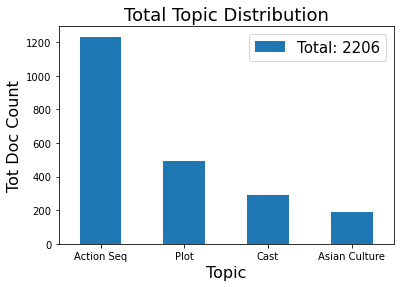

In [95]:
#Topic 0 = story line, fighting scene
#Topic 1 = Asian culture 
#Topic 2 = Martial Arts and Fantasy 
#Topic 3 = Cast i.e awkwafina, simu_liu tony_leung
#find over all distribution of topics
topics = ['Action Seq','Plot','Cast','Asian Culture']
final_df_corex.topic.value_counts().plot(kind='bar')
df_len=len(final_df_corex)
plt.legend([f"Total: {df_len}"], prop={"size":15})

plt.xlabel('Topic', fontsize=16)
plt.ylabel('Tot Doc Count', fontsize=16);
plt.xticks(ticks=np.arange(4),labels=topics,rotation=0)

plt.title('Total Topic Distribution',fontsize='18')

In [96]:
pos_mask = final_df_corex['pos_neg_neutral']=='pos'
neg_mask = final_df_corex['pos_neg_neutral']=='neg'
neutural_mask = final_df_corex['pos_neg_neutral']=='neutral'

Text(0.5, 1.0, 'Topic Distribution (Positive Reviews)')

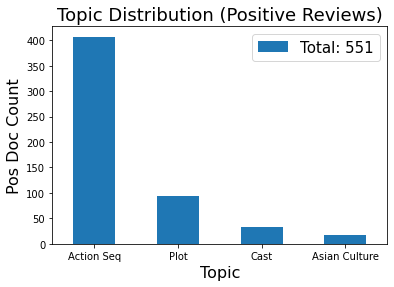

In [97]:
#topic distribution for positive reviews
final_df_corex[pos_mask].topic.value_counts().plot(kind='bar')
pos_len=len(final_df_corex[pos_mask])
plt.legend([f"Total: {pos_len}"], prop={"size":15})
plt.xlabel('Topic', fontsize=16)
plt.ylabel('Pos Doc Count', fontsize=16);


plt.xticks(ticks=np.arange(4),labels=topics,rotation=0)

plt.title('Topic Distribution (Positive Reviews)',fontsize='18')


In [98]:
#topic distribution for negative reviews
final_df_corex[neg_mask].topic.value_counts().plot(kind='bar')

neg_len=len(final_df_corex[neg_mask])
plt.legend([f"Total: {neg_len}"], prop={"size":15})
plt.xlabel('Topic', fontsize=16)
plt.ylabel('Neg Doc Count', fontsize=16);

plt.xticks(ticks=np.arange(4),labels=topics,rotation=0)

plt.title('Topic Distribution (Negtive Reviews)',fontsize='18')

Text(0.5, 1.0, 'Topic Distribution (Negtive Reviews)')

In [99]:
#topic distribution for neutral reviews
final_df_corex[neutural_mask].topic.value_counts().plot(kind='bar')

neut_len=len(final_df_corex[neutural_mask])
plt.legend([f"Total: {neut_len}"], prop={"size":15})
plt.xlabel('Topic', fontsize=16)
plt.ylabel('Neutral Doc Count', fontsize=16);


plt.xticks(ticks=np.arange(4),labels=topics,rotation=0)

plt.title('Topic Distribution (Neutral Reviews)',fontsize='18')

Text(0.5, 1.0, 'Topic Distribution (Neutral Reviews)')

In [40]:
#pull in original reviews

original_reviews=pd.read_csv('shang_chi_reviews.csv')
original_reviews.drop('Unnamed: 0',axis=1,inplace=True)
original_reviews.head()

review
0  shang chi review   spectacular visual wonder m...
1  the much awaited shangi chi and the legend of ...
2  like many  i was concerned that this new marve...
3  no movie is without flaws  but this was a brea...
4  hands down one of the best mcu movies  every a...

In [94]:
#looking at negative reviews

final_df_corex[neg_mask].head()

review  polarity          0  \
82   this movie reveal the very complicated relatio... -0.029545  -1.103528   
87   amazing no plot whole quick story development ... -0.034314   1.976654   
126  this be I begin to middle and awful the rest o... -0.041071  -1.127372   
161  this movie be ruin by racism sterno type with ... -0.014706   1.278117   
177  not a strong film in the slight I have very hi... -0.027653  10.578621   

             1          2          3  topic pos_neg_neutral  
82   15.055646  15.777534   2.377605      2             neg  
87    0.489978   8.344672   1.325553      2             neg  
126   0.675029  73.255719  15.499792      2             neg  
161   9.643561  42.409071  13.939263      2             neg  
177  27.139543  65.797514  24.743050      2             neg

In [93]:
#get df of negative topic 1 (asian culture)

neg_top1=final_df_corex[neg_mask][final_df_corex[neg_mask]['topic']==1]
neg_top1.sort_values(1,ascending=False).head(1)

review  polarity         0  \
351  just a non canon you character it seem as if t... -0.214583  1.266571   

             1         2         3  topic pos_neg_neutral  
351  16.817912 -0.093472  3.221122      1             neg

In [62]:
#example of negative review about asian culture

original_reviews.review.loc[351]

'just a non canon mcu character   it seems as if the director of crazy rich asians is trying to ensure an asian spotlight  it has failed  the movie is equal to   ronin  which keanu was called a heritage taker  this is a small strike at the grasp of making it  i recommend he sticks to kim s convenience in canada'

In [92]:
#get df of negative topic 0 (plot)

neg_top0=final_df_corex[neg_mask][final_df_corex[neg_mask]['topic']==0]
neg_top0.sort_values(0,ascending=False).head(13)

review  polarity         0  \
2080                             hell yeah baby lets go  0.000000  2.322096   
2103  typical you nothing else but cheapness be over... -0.166667  2.321509   
1342  this show never calm out in my country yet but... -0.150000  1.995352   
2191                   chinese propaganda of hilly ball -0.050000  1.987583   
2011         it s may be get in limb but not interested -0.125000  1.982837   
2053                             what a movie marvel op  0.000000  1.982837   
2004    outrageous bad it be difficult to give one star -0.733333  1.981293   
1407  truly exhilarate take I back to those jet li move  0.000000  1.980752   
2164  gooooooooooooooooooooooooooooooooooooooooooooo...  0.000000  1.979756   
2155               it s like when hernia and milan meat  0.000000  1.979755   
2171  yessssssssssssssssssssssssssssssssssssssssssss...  0.000000  1.979720   
2173                 star should be and big poggchampin  0.000000  1.979647   
1821  bad marvel movie so far poorly write and badly... -0.425000  1.979458   

             1         2         3  topic pos_neg_neutral  
2080  1.045015  1.962124  0.076847      0             neg  
2103  1.045984  1.211489  1.505697      0             neg  
1342  1.044955  1.149330  1.066643      0             neg  
2191 -0.725048  1.928938  1.322755      0             neg  
2011  1.045920  1.929012  1.508937      0             neg  
2053  0.761719  1.928986  1.327302      0             neg  
2004  0.466964  1.416395  1.475903      0             neg  
1407  1.198457  1.548870  0.703130      0             neg  
2164  0.925916  1.928986  1.326895      0             neg  
2155  1.177293  0.439281  1.321286      0             neg  
2171  1.045960  1.928986  1.069111      0             neg  
2173  0.473553  1.928962  0.338016      0             neg  
1821 -0.010908  0.937356  1.008081      0             neg

In [69]:
#example of negative review about topic 0
original_reviews.review.loc[1821]

'worst marvel movie so far  poorly written and badly put together'

In [91]:
#looking at positive reviews top 1(asian culture)

pos_top1=final_df_corex[pos_mask][final_df_corex[pos_mask]['topic']==1]
pos_top1.sort_values(1,ascending=False).head(1)

review  polarity         0  \
318  usually awesome it enlighten a lot about taiwa...  0.551429 -0.149072   

            1         2         3  topic pos_neg_neutral  
318  9.016102 -1.226878  0.853143      1             pos

In [47]:
#example for positive asian culture review

original_reviews.review.loc[318]

'visually awesome  it enlightens a lot about taiwanese and chinese culture  specially about mythical creatures  which i will not mention to avoid spoilers  fighting music is really smooth and you can tell that they have been perfectly choreographed'

In [90]:
#looking at positive reviews top 0(plot)

pos_top0=final_df_corex[pos_mask][final_df_corex[pos_mask]['topic']==0]
pos_top0.sort_values(0,ascending=False).head(1)

review  polarity         0  \
577  great film excellent cast and act destiny dani...  0.592857  7.212837   

            1         2         3  topic pos_neg_neutral  
577  1.003568  1.864113  0.695471      0             pos

In [49]:
#example for positive plot review

original_reviews.review.loc[577]

'great film  excellent cast and acting  destin daniel cretton has directed another stunner  special effects were amazing  good story line  too'

In [87]:
#looking at positive for top 3 cast
pos_top3=final_df_corex[pos_mask][final_df_corex[pos_mask]['topic']==3]
pos_top3.sort_values(3,ascending=False).head(1)

review  polarity         0  \
65  if you like marvel move and asia film this be ...  0.610278 -0.780857   

           1        2          3  topic pos_neg_neutral  
65 -0.658736  3.23401  17.547411      3             pos

In [51]:
#example at positive for top 3 cast
original_reviews.review.loc[65]

'if you like marvel movies and asian films  this is the perfect mix  great cast  great director  simu liu  was perfect for this role  awkwafina was marvelous  everytime i see her movies  i just love her more  great chemistry between the two leads  michelle yeoh  need i say more     fala chen  tony leung chiu wai  benedict    wong  meng  er zhang awesome  awesome  awesome  it brings asian fantasy finally to america  i have always loved asian films  they bring their stories alive with their rich history and mythology  highly recommend the movie  go see it'

In [86]:
#looking at negative for top 3 cast
neg_top3=final_df_corex[neg_mask][final_df_corex[neg_mask]['topic']==3]
neg_top3.sort_values(3,ascending=False).head(3)

review  polarity         0  \
786  it do have some of the you s flaw if you don t... -0.088611  0.415616   
482  the explicit language ruin it for we my or old... -0.243750  1.202193   
451  this be one of the bad marvel production not s... -0.054545 -0.252969   

            1         2         3  topic pos_neg_neutral  
786  0.262029 -1.132505  9.828128      3             neg  
482 -0.513112  1.416359  6.770209      3             neg  
451  0.122456  1.867315  6.743016      3             neg

In [118]:
#example at negative for top 3 cast
print(original_reviews.review.loc[451],'\n')
print(original_reviews.review.loc[786])

this is one of the worst marvel productions  not sure why wong needed to be part of the movie   but overall this movie is not worth watching  the initial part of the movie  leading up to the bus fight was quite promising but subsequently was a waste of time  definitely not worth going to the cinema to watch  there were some hilarious scenes here and there but the lack of storyline and loopholes just spoils the whole movie experience  from stealing the jade pendant to installing it on the lion eyes just lack some storyline of how all this came about 

it does have some of the mcu s flaws  if you don t like the mcu you might not like it  unless you re problem is marvels fight coreogrophy  that definitely wasn t an issue        had a hard time deciding what star to round it to  rounded low because i think it s rating is to high


In [89]:
#looking at positive for top 2 Martial arts
pos_top2=final_df_corex[pos_mask][final_df_corex[pos_mask]['topic']==2]
pos_top2.sort_values(2,ascending=False).head(7)

review  polarity         0  \
1899                    brilliant movie üëç max be a must    0.9000  1.639694   
893   this be one of the most influential move I hav...    0.5500  1.266863   
2001   amazing üòó üòó it be soooooooo gooooooooooooooooood    0.6000  1.266863   
1198  it ' s a fantastic story and truly belong with...    0.6000 -0.508588   
869   this movie be so amazing and so awesome to wat...    0.5875 -1.026959   
1641   nice movie but I thing this movie so many income    0.5500  1.637281   
824   top three good marvel movie fight scene have I...    0.6625 -1.524965   

             1         2         3  topic pos_neg_neutral  
1899  0.925625  2.060980  0.548326      2             pos  
893   0.925865  2.059075  0.815574      2             pos  
2001  1.198643  2.059075  1.326733      2             pos  
1198  0.881250  2.059074  0.181739      2             pos  
869   0.925773  2.059069  1.062130      2             pos  
1641  0.678304  2.058490  0.526560      2             pos  
824   0.759562  1.999163  0.223514      2             pos

In [81]:
#example at positive for top 2 Martial arts
original_reviews.review.loc[824]

'top three best marvel movie  fight scenes have me chills  chemistry was amazing  beautiful'

In [88]:
#looking at negative for top 2
neg_top2=final_df_corex[neg_mask][final_df_corex[neg_mask]['topic']==2]
neg_top2.sort_values(2,ascending=False).head(3)

review  polarity          0  \
126  this be I begin to middle and awful the rest o... -0.041071  -1.127372   
177  not a strong film in the slight I have very hi... -0.027653  10.578621   
180  this movie be terrible action scene be I jacke... -0.088670  -0.735461   

             1          2          3  topic pos_neg_neutral  
126   0.675029  73.255719  15.499792      2             neg  
177  27.139543  65.797514  24.743050      2             neg  
180   4.717271  50.365604   7.606885      2             neg

In [85]:
#example at negative for top 2 Martial arts
original_reviews.review.loc[180]

'this movie was terrible  action scenes were meh   jackie chan s worst action scene was better then this   the characters were poorly written  acting itself was a snoozefest   i never even heard of shang chi becasuse i am not a comic book reader but before the movie a did a little bit of reading from the old   s comics  this addaptation of the character was so preverted it s a travasty to the great mcu  what were you guys smoking    or did you not smoke enough     i gave marvel a shot at phase   but  you down played wanda and ruined it for me  you critical race theory falcon which is a shame cause i love anthony mackee  and you killed loki because no matter how great was tom hiddleston you wrote it into the freaking ground  and ofc  black widow was a missed opportunity  bad writing and bad performance     shang chi could have saved it with        i am done wasting money on disney s marvel    not going to watch the eternals or anything else  consider my wallet retired'

In [117]:
final_df_corex[neg_mask].sort_values('polarity',ascending=True)

review  polarity         0  \
2039                this be boring movie I ever watch -1.000000  1.244634   
2200                                     boring story -1.000000  0.210625   
2033                        the fight scene be insane -1.000000 -0.890240   
2102       this be not expect completely disappointed -0.750000  1.631178   
2004  outrageous bad it be difficult to give one star -0.733333  1.981293   
...                                               ...       ...       ...   
1979   didn ' t do it for I aquafina hold it together  0.000000  1.631181   
1983      can t say about the movie just go and watch  0.000000  1.638272   
2002                      see this in lawless victory  0.000000  1.637638   
1972     this movie be the besttttttttttttttttttttttt  0.000000  1.638308   
2204                                that what she say  0.000000  1.638308   

             1         2         3  topic pos_neg_neutral  
2039  0.925855  1.928893  1.068884      2             neg  
2200  1.045960  1.928893  1.327119      2             neg  
2033  1.045800  1.405288  1.326991      2             neg  
2102 -0.714301  0.976124  1.278471      0             neg  
2004  0.466964  1.416395  1.475903      0             neg  
...        ...       ...       ...    ...             ...  
1979 -0.411448 -0.283933  1.320260      0             neg  
1983  0.925878  1.928986  0.136154      2             neg  
2002  1.197337  1.654451  1.326464      2             neg  
1972  0.925916  1.928986  1.507269      2             neg  
2204  1.045990  1.928986  0.875794      2             neg  

[234 rows x 8 columns]